<a href="https://colab.research.google.com/github/widyadaridhyp/Unlocking-Online-Shopper-Behavior/blob/develop/FINAL_PROJECT_SEABORN_TEAM_Preprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/widyadaridhyp/Unlocking-Online-Shopper-Behavior/main/dataset.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0.0,NaN,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


# New Section

In [4]:
# Rename columns with lowercase
def rename_column(col):
  return col.lower()

new_cols = [rename_column(col) for col in df.columns]

# Apply the new column names
df.columns = new_cols

In [5]:
#change the column for two word separated with '_'(underscore)
df = df.rename(columns={'productrelated': 'product_related',
                        'productrelated_duration':'product_related_duration',
                        'productrelated_duration':'product_related_duration',
                        'bouncerates':'bounce_rates',
                        'exitrates':'exit_rates',
                        'pagevalue':'page_value',
                        'specialday':'special_day',
                        'operatingsystems': 'operating_systems',
                        'traffictype': 'traffic_type',
                        'visitortype': 'visitor_type'})

In [6]:
df.head(3)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,pagevalues,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False


In [7]:
#change weekend into 1 and 0
df['weekend'] = df['weekend'].replace({True: 1, False: 0})

In [8]:
#change column revenue into 1 and 0
df['revenue'] = df['revenue'].replace({True:1, False:0})

**DATA PREPARATION**
- Handle missing values
- Handle duplicated data
- Handle outliers - Bintang
- Feature transformation - Bintang
- Feature encoding - Widya
- Handle class imbalance - Wafi
- Feature Engineering -Fajar

# **Missing Values**

In [9]:
#cek missing value
df.isnull().any()

administrative               True
administrative_duration      True
informational               False
informational_duration      False
product_related             False
product_related_duration     True
bounce_rates                 True
exit_rates                  False
pagevalues                  False
special_day                 False
month                       False
operating_systems            True
browser                     False
region                      False
traffic_type                False
visitor_type                False
weekend                     False
revenue                     False
dtype: bool

**There is a missing value on column:**
- administrative
- administrative_duration
- product_related_duration
- bounce_rates
- operating_systems

In [10]:
# change Null on administrative where the administrative_duration is Null
df.loc[(df['administrative'].isnull()) & (df['administrative_duration'].isnull()), ['administrative', 'administrative_duration']]=0

# change Null value on administrative_duration where administrative is 0
df.loc[(df['administrative'] == 0) & (df['administrative_duration'].isnull()), 'administrative_duration'] = 0

#change Null value on administrative where administrative_duraiton is 0
df.loc[(df['administrative'].isnull()) & (df['administrative_duration'] == 0), 'administrative'] = 0

In [11]:
# for Null value on administration where the administrative_duration has a value > 0
# will be use an asumption where the visiting administrative page is 2 minutes or 120 second
# Hence the Null value on administrative will be filled with the formula of administrative_duration/60

df.loc[(df['administrative'].isnull()) & (df['administrative_duration']>0),'administrative'] = df['administrative_duration'] / 120

In [12]:
# to fill Null value on administrative_duration where administrative > 0
# will be used the same method as above
df.loc[(df['administrative_duration'].isnull()) & (df['administrative']>0),'administrative_duration'] = df['administrative'] * 120

In [13]:
df.loc[(df['product_related'] > 0) & (df['product_related_duration'].isnull()),'product_related_duration'] = df['product_related'] * 120

In [14]:
df.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,pagevalues,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,1,0


In [15]:
# fill Null value on product_related_duration where product_related is 0
df.loc[(df['product_related']==0) & (df['product_related_duration'].isnull()),'product_related_duration'] = 0

In [16]:
#drop the Null value from bounce_rate
df_cleaned = df.dropna(subset=['bounce_rates'])


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12872 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12872 non-null  float64
 1   administrative_duration   12872 non-null  float64
 2   informational             12872 non-null  int64  
 3   informational_duration    12872 non-null  float64
 4   product_related           12872 non-null  int64  
 5   product_related_duration  12872 non-null  float64
 6   bounce_rates              12872 non-null  float64
 7   exit_rates                12872 non-null  float64
 8   pagevalues                12872 non-null  float64
 9   special_day               12872 non-null  float64
 10  month                     12872 non-null  object 
 11  operating_systems         12353 non-null  float64
 12  browser                   12872 non-null  int64  
 13  region                    12872 non-null  int64  
 14  traffic_typ

In [18]:
df_cleaned['operating_systems'].fillna(df['operating_systems'].mode()[0], inplace=True)

<ipython-input-18-38d3fd050ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['operating_systems'].fillna(df['operating_systems'].mode()[0], inplace=True)


In [19]:
df_cleaned.isnull().any()

administrative              False
administrative_duration     False
informational               False
informational_duration      False
product_related             False
product_related_duration    False
bounce_rates                False
exit_rates                  False
pagevalues                  False
special_day                 False
month                       False
operating_systems           False
browser                     False
region                      False
traffic_type                False
visitor_type                False
weekend                     False
revenue                     False
dtype: bool

# Duplicated

In [20]:
#drop the duplicates
df_cleaned= df_cleaned.drop_duplicates()

In [21]:
df_cleaned.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12148, dtype: bool

# Handle outliers

In [22]:

def check_outliers(df_cleaned):
    outliers = pd.DataFrame(columns=df_cleaned.columns)

    for col in df_cleaned.select_dtypes(include=[np.number]):
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)

    return df_cleaned.assign(**outliers)

df_with_outliers = check_outliers(df.copy())
print(df_with_outliers.any())

administrative               True
administrative_duration      True
informational                True
informational_duration       True
product_related              True
product_related_duration     True
bounce_rates                 True
exit_rates                   True
pagevalues                   True
special_day                  True
month                       False
operating_systems            True
browser                      True
region                       True
traffic_type                 True
visitor_type                False
weekend                      True
revenue                      True
dtype: bool


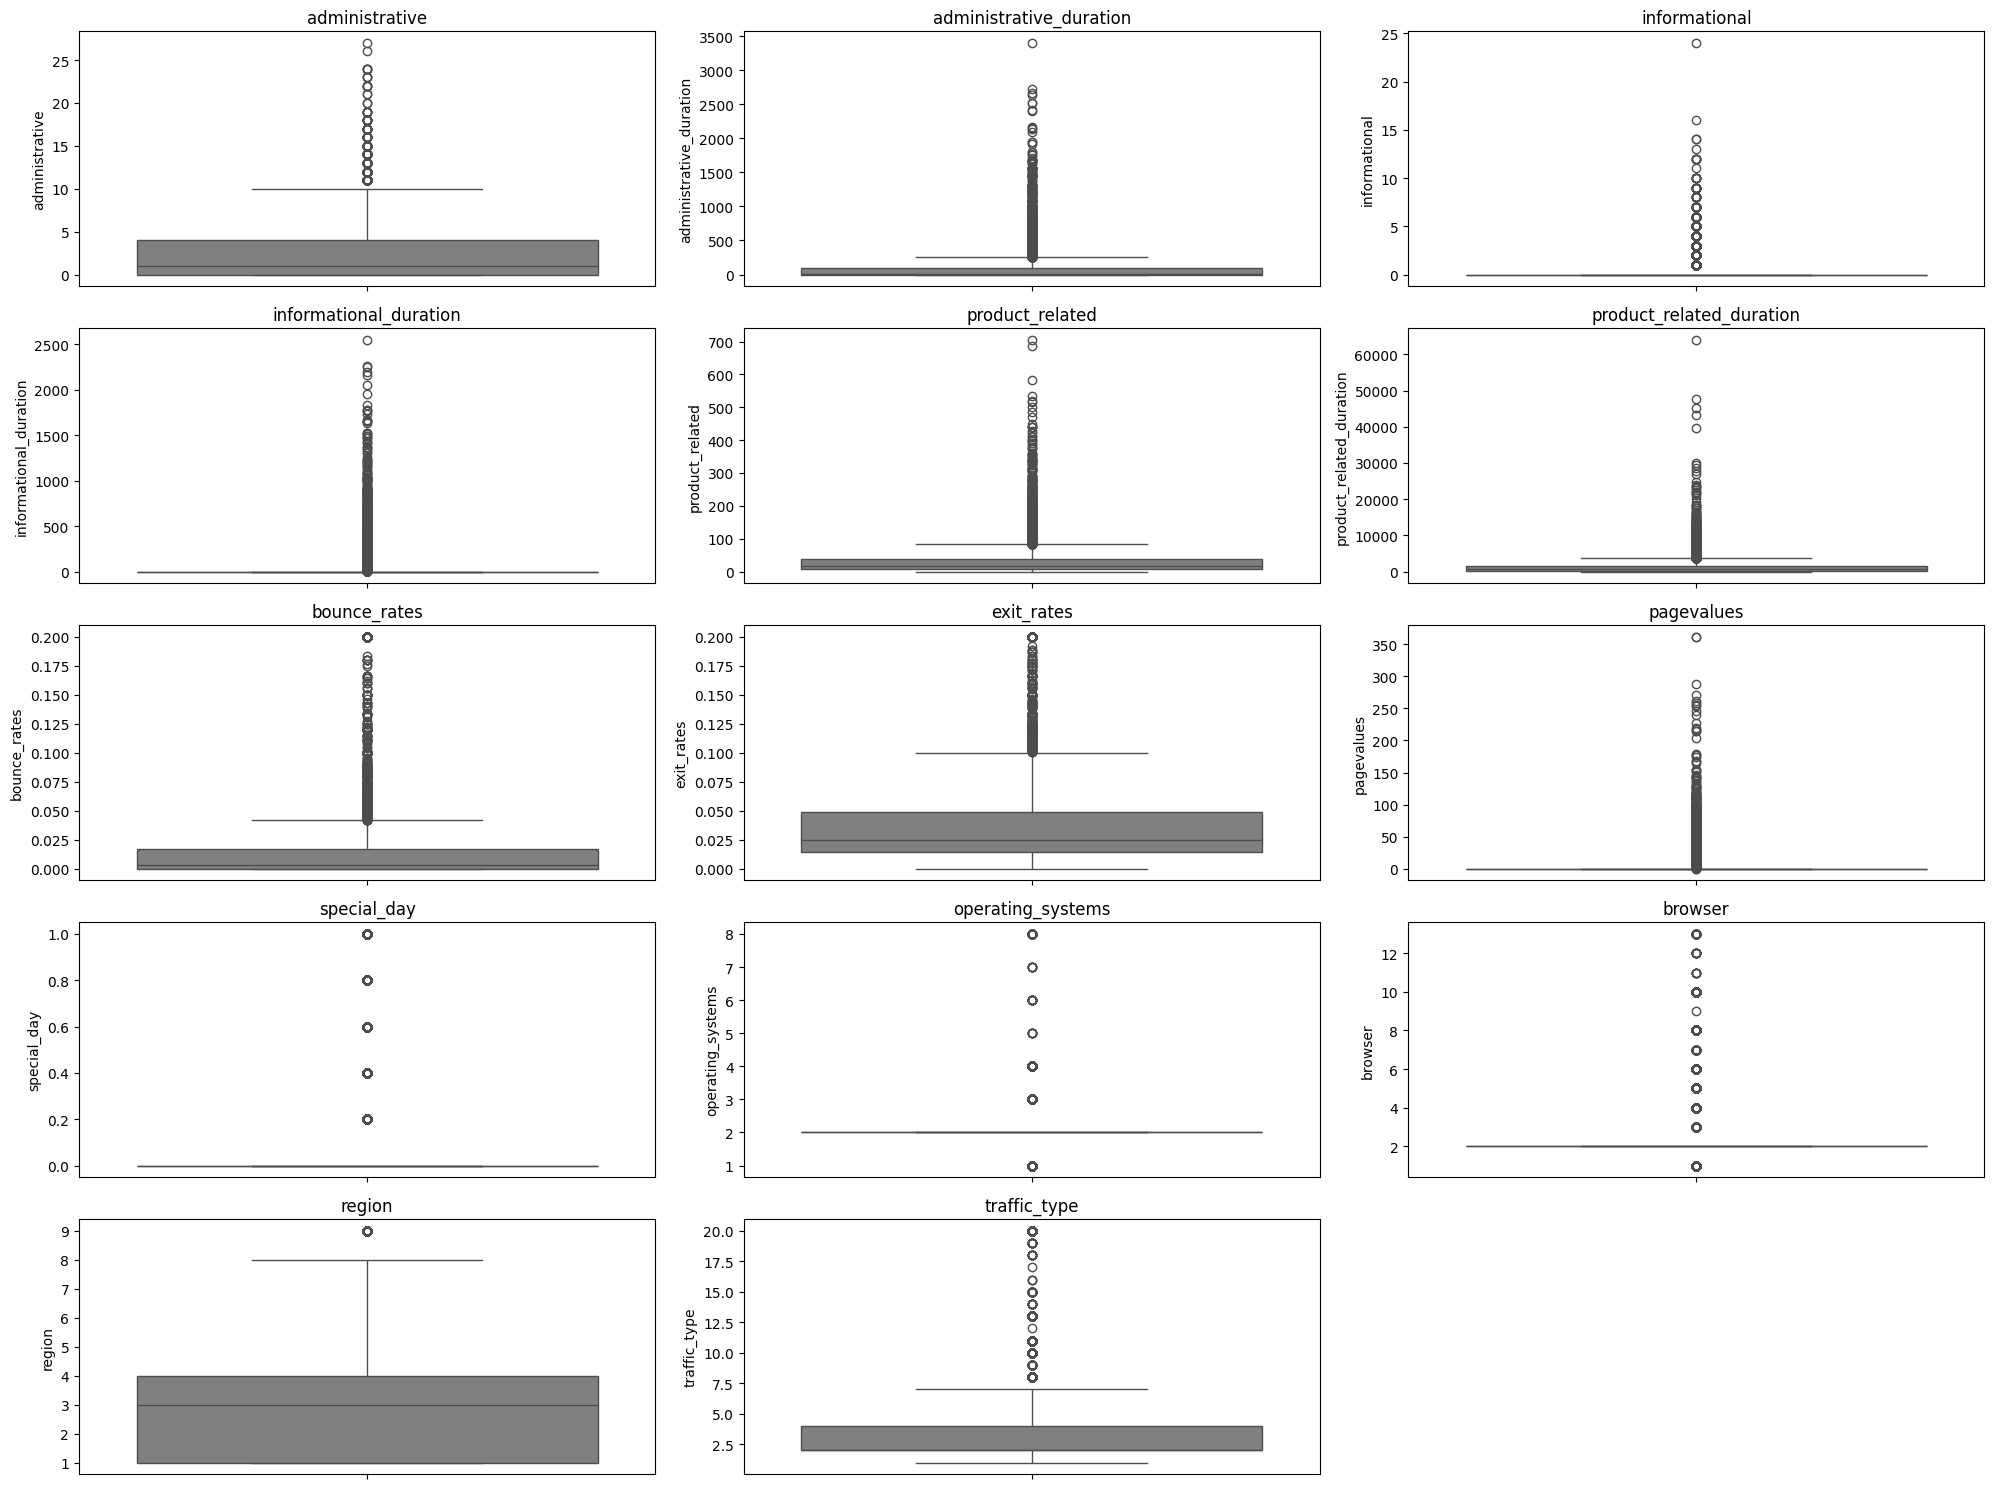

In [23]:
category = ['month', 'visitor_type', 'weekend', 'revenue']
nums = ['administrative', 'administrative_duration', 'informational', 'informational_duration', 'product_related',
        'product_related_duration', 'bounce_rates', 'exit_rates', 'pagevalues', 'special_day', 'operating_systems',
        'browser', 'region', 'traffic_type']

# Menentukan ukuran figure secara keseluruhan
plt.figure(figsize=(20, 15))

for i in range(len(nums)):
    plt.subplot(len(nums) // 3 + 1, 3, i + 1)  # Mengatur subplot menjadi beberapa baris
    sns.boxplot(y=df_cleaned[nums[i]], color='gray', orient='v')
    plt.title(nums[i])  # Menambahkan judul pada setiap subplot

plt.tight_layout()
plt.show()

In [24]:
#menghapus outliers menggunakan IQR pada data kolom yang signifikan
#outliers of administrative_duration column
Q1_administrative_duration = df_cleaned['administrative_duration'].quantile(0.25)
Q3_administrative_duration = df_cleaned['administrative_duration'].quantile(0.75)
IQR_administrative_duration = Q3_administrative_duration - Q1_administrative_duration
lower_bound_ad = Q1_administrative_duration - 1.5 * IQR_administrative_duration
upper_bound_ad = Q3_administrative_duration + 1.5 * IQR_administrative_duration


#outliers of informational_duration column
Q1_informational_duration = df_cleaned['informational_duration'].quantile(0.25)
Q3_informational_duration = df_cleaned['informational_duration'].quantile(0.75)
IQR_informational_duration = Q3_informational_duration - Q1_informational_duration
lower_bound_id = Q1_informational_duration - 1.5 * IQR_informational_duration
upper_bound_id = Q3_informational_duration + 1.5 * IQR_informational_duration

#outliers of product_related column
Q1_product_related = df_cleaned['product_related'].quantile(0.25)
Q3_product_related = df_cleaned['product_related'].quantile(0.75)
IQR_product_related = Q3_product_related - Q1_product_related
lower_bound_pr = Q1_product_related - 1.5 * IQR_product_related
upper_bound_pr = Q3_product_related + 1.5 * IQR_product_related

#outliers of product_related_duration column
Q1_product_related_duration = df_cleaned['product_related_duration'].quantile(0.25)
Q3_product_related_duration = df_cleaned['product_related_duration'].quantile(0.75)
IQR_product_related_duration = Q3_product_related_duration - Q1_product_related_duration
lower_bound_prd = Q1_product_related_duration - 1.5 * IQR_product_related_duration
upper_bound_prd = Q3_product_related_duration + 1.5 * IQR_product_related_duration

#outliers of bounce_rates column
Q1_bounce_rates = df_cleaned['bounce_rates'].quantile(0.25)
Q3_bounce_rates = df_cleaned['bounce_rates'].quantile(0.75)
IQR_bounce_rates = Q3_bounce_rates - Q1_bounce_rates
lower_bound_br = Q1_bounce_rates - 1.5 * IQR_bounce_rates
upper_bound_br = Q3_bounce_rates + 1.5 * IQR_bounce_rates

#outliers of exit_rates column
Q1_exit_rates = df_cleaned['exit_rates'].quantile(0.25)
Q3_exit_rates = df_cleaned['exit_rates'].quantile(0.75)
IQR_exit_rates = Q3_exit_rates - Q1_exit_rates
lower_bound_er = Q1_exit_rates - 1.5 * IQR_exit_rates
upper_bound_er = Q3_exit_rates + 1.5 * IQR_exit_rates

#outliers of pagevalues column
Q1_pagevalues = df_cleaned['pagevalues'].quantile(0.25)
Q3_pagevalues = df_cleaned['pagevalues'].quantile(0.75)
IQR_pagevalues = Q3_pagevalues - Q1_pagevalues
lower_bound_pv = Q1_pagevalues - 1.5 * IQR_pagevalues
upper_bound_pv = Q3_pagevalues + 1.5 * IQR_pagevalues

In [25]:
rate_outlier_bounced = df[(df['bounce_rates']<=lower_bound_br) | (df['bounce_rates']>=upper_bound_br)]['bounce_rates'].count()/df['bounce_rates'].count()

In [26]:
rate_outlier_bounced

0.12686451211932878

In [27]:
rate_outlier_exit = df[(df['exit_rates']<=lower_bound_er) | (df['exit_rates']>=upper_bound_er)]['exit_rates'].count()/df['product_related'].count()

In [28]:
rate_outlier_exit

0.09114784489417581

In [29]:
# Hapus outliers bounce rate menggunakan batas bawah dan atas yang telah dihitung
df_cleaned_filtered =df_no_outliers = df_cleaned[(df_cleaned['bounce_rates'] >= lower_bound_br) & (df_cleaned['bounce_rates'] <= upper_bound_br)]

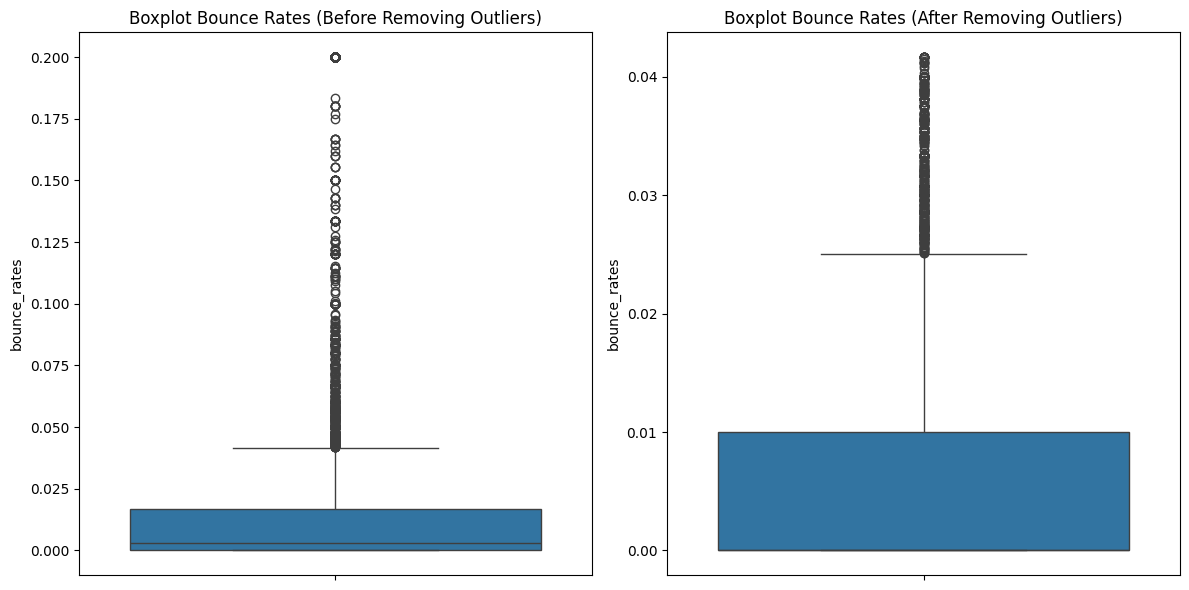

In [30]:
# Plot boxplot sebelum dan sesudah menghapus outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned['bounce_rates'])
plt.title('Boxplot Bounce Rates (Before Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned_filtered['bounce_rates'])
plt.title('Boxplot Bounce Rates (After Removing Outliers)')

plt.tight_layout()
plt.show()

# Feature transformation

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [32]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

In [33]:
data = df_cleaned.copy()

In [34]:
#normalisasi
data['administrative_norm'] = MinMaxScaler().fit_transform(df_cleaned['administrative'].values.reshape(len(df_cleaned),1))
data['informational_norm'] = MinMaxScaler().fit_transform(df_cleaned['informational'].values.reshape(len(df_cleaned),1))

In [35]:
#menunjukan hasil data yang sudah di normalisasi
data[['administrative','informational','administrative_norm', 'informational_norm']].describe()

,administrative,informational,administrative_norm,informational_norm
count,12148.000000,12148.000000,12148.000000,12148.000000
mean,2.320258,0.508561,0.085935,0.021190
std,3.320349,1.274666,0.122976,0.053111
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.037037,0.000000
75%,4.000000,0.000000,0.148148,0.000000
max,27.000000,24.000000,1.000000,1.000000


In [36]:
#log transformation pada data outliers yang signifikan
data['administrative_duration_log'] = np.log(df_cleaned['administrative_duration'])
data['informational_duration_log'] = np.log(df_cleaned['informational_duration'])
data['product_related_log'] = np.log(df_cleaned['product_related'])
data['product_related_duration_log'] = np.log(df_cleaned['product_related_duration'])
data['bounce_rates_log'] = np.log(df_cleaned['bounce_rates'])
data['exit_rates_log'] = np.log(df_cleaned['exit_rates'])
data['pagevalues_log'] =np.log(df_cleaned['pagevalues'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = geta

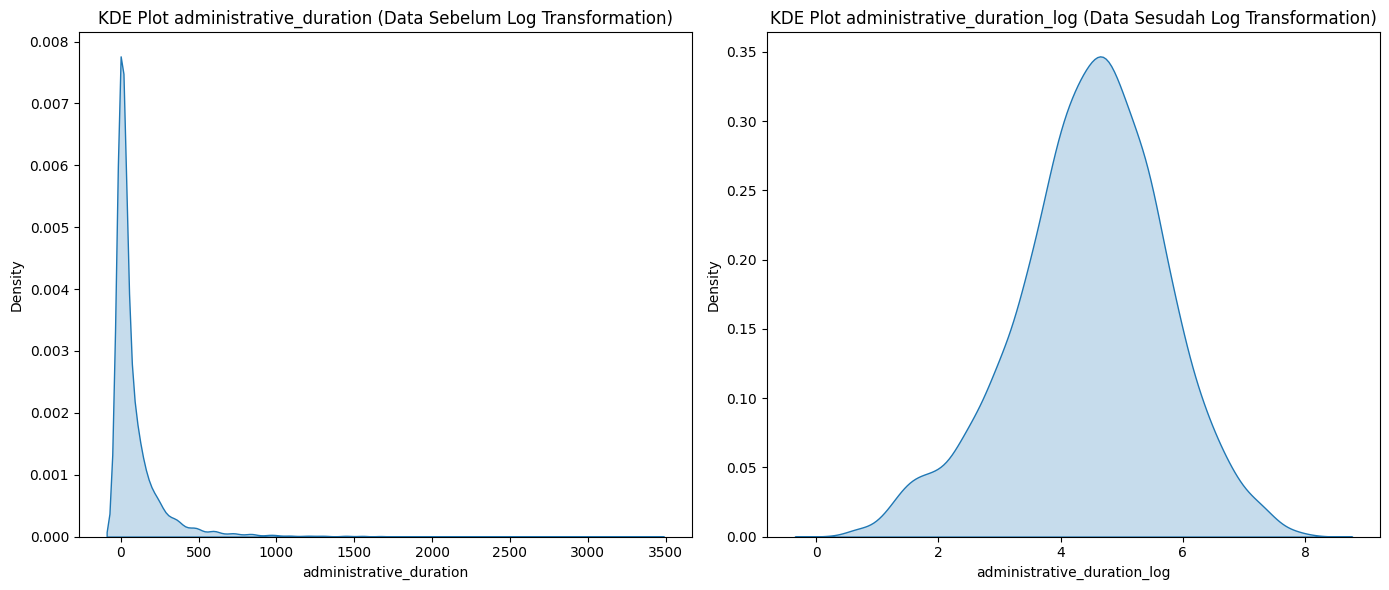

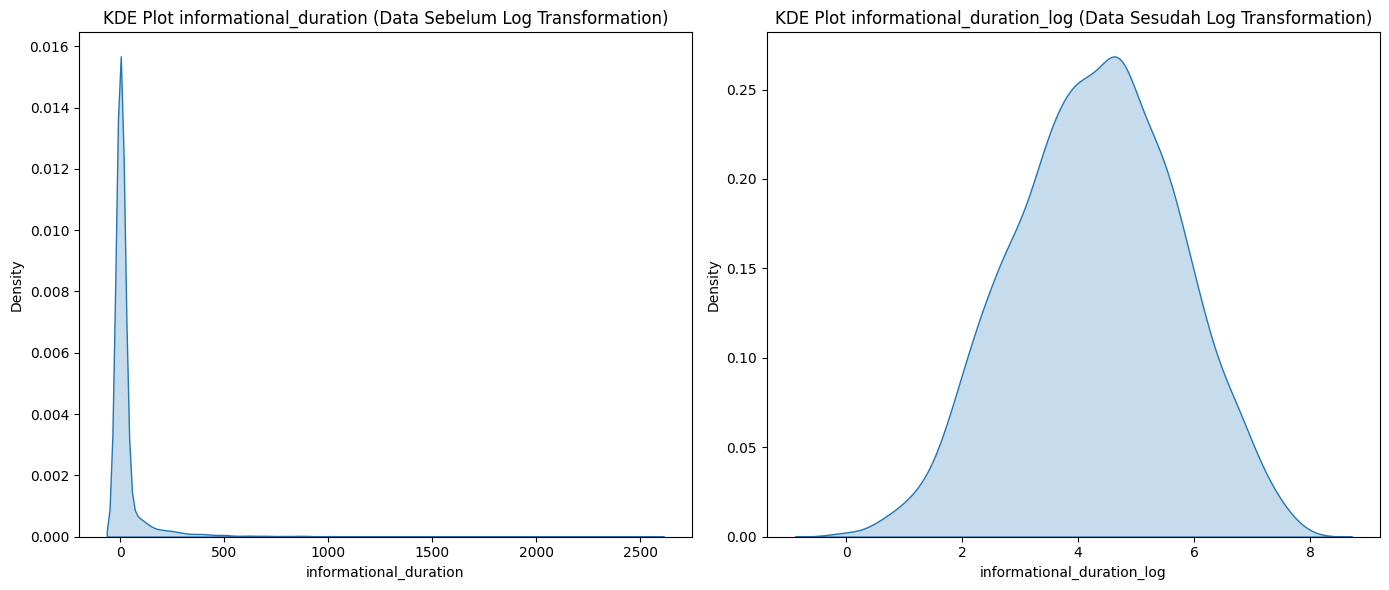

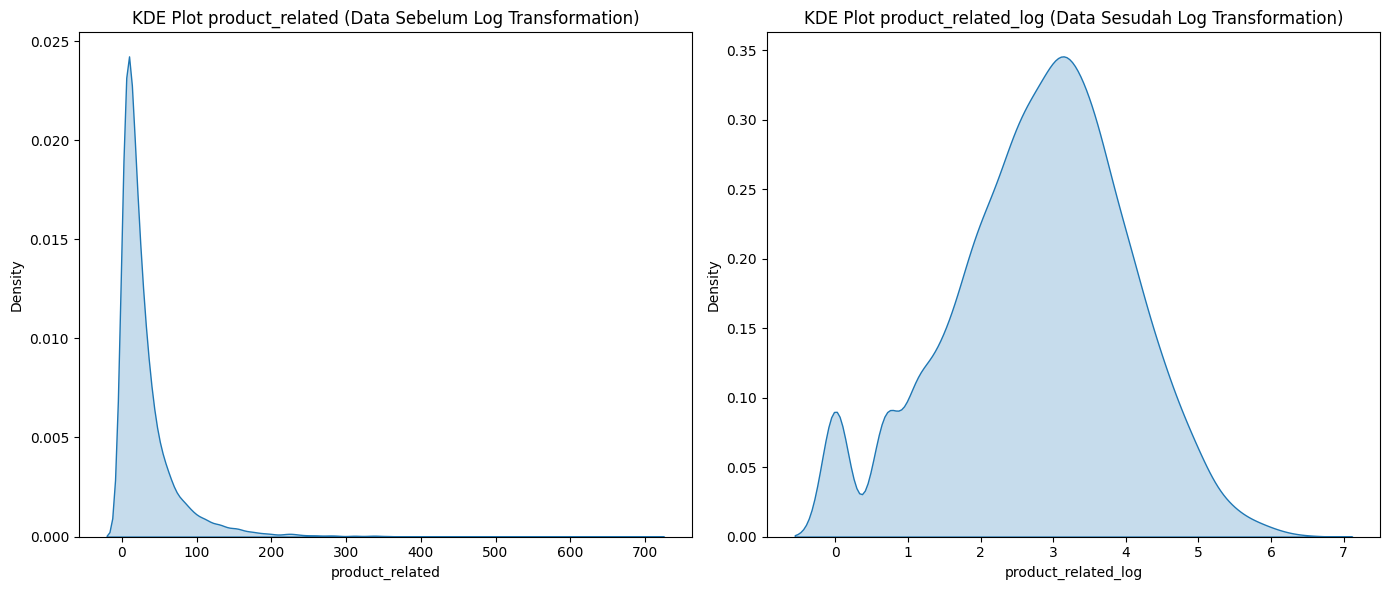

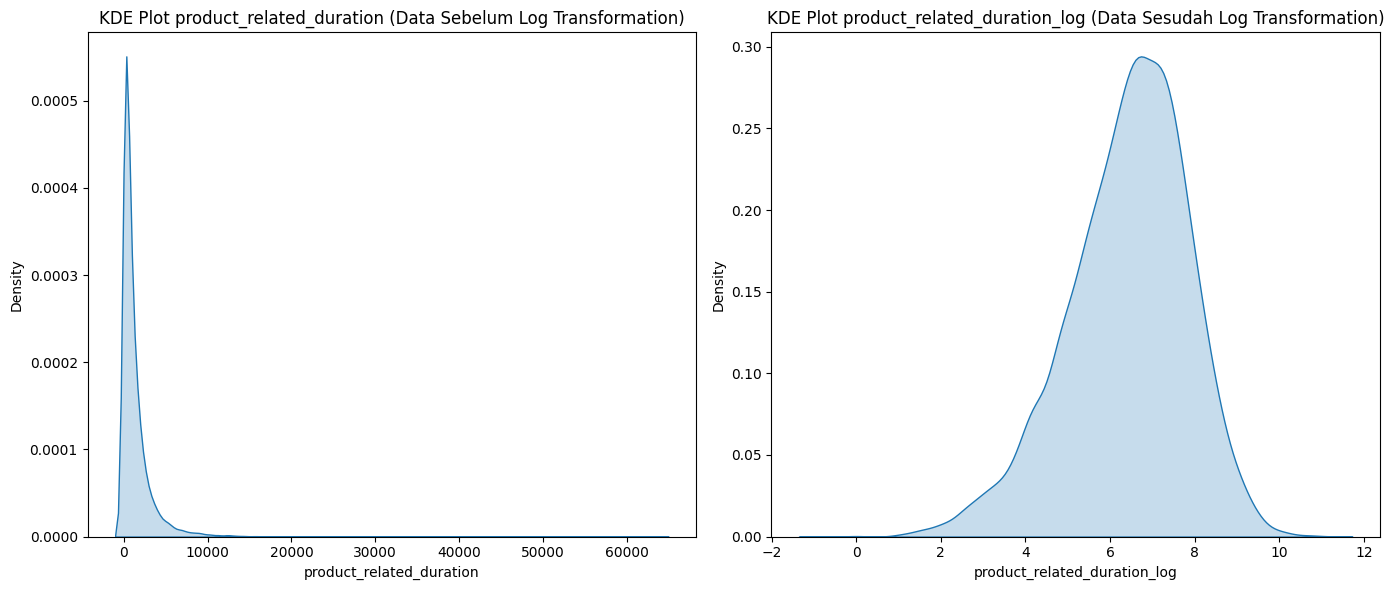

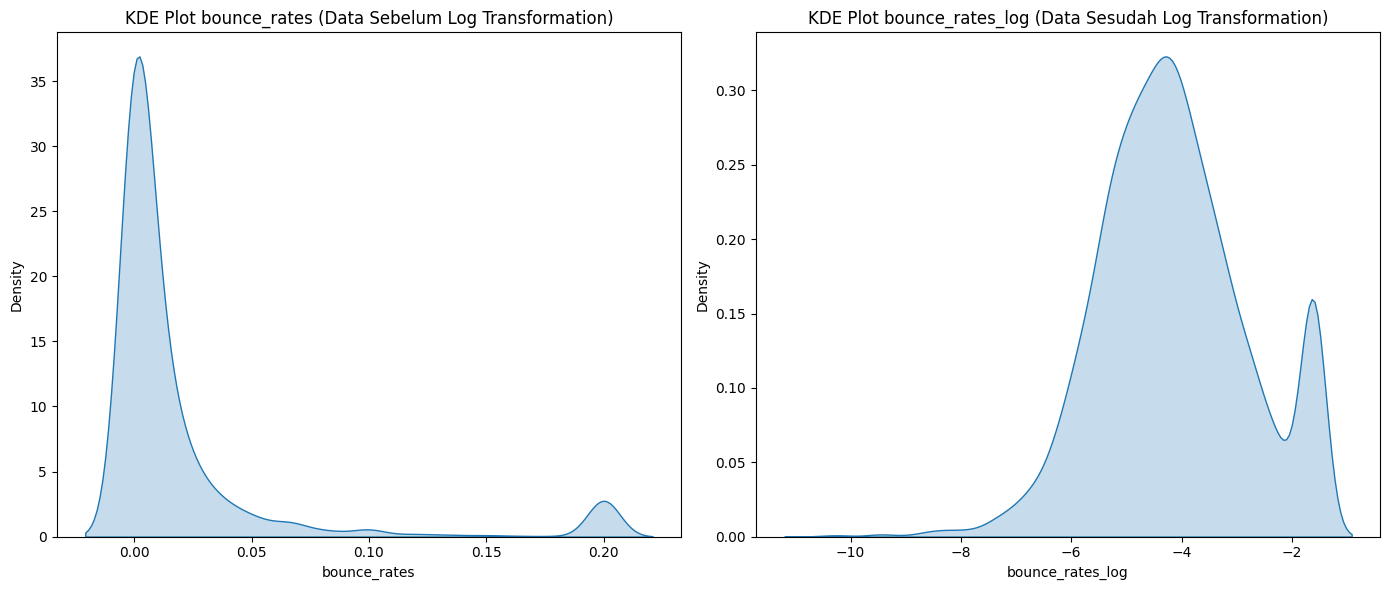

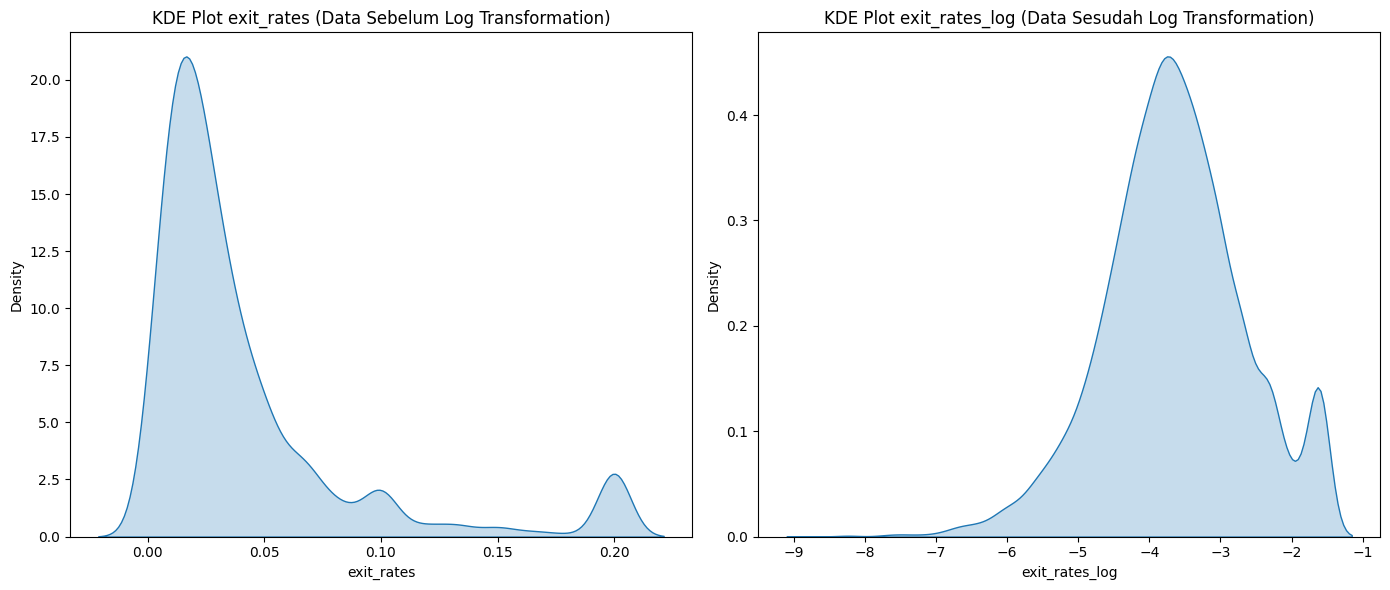

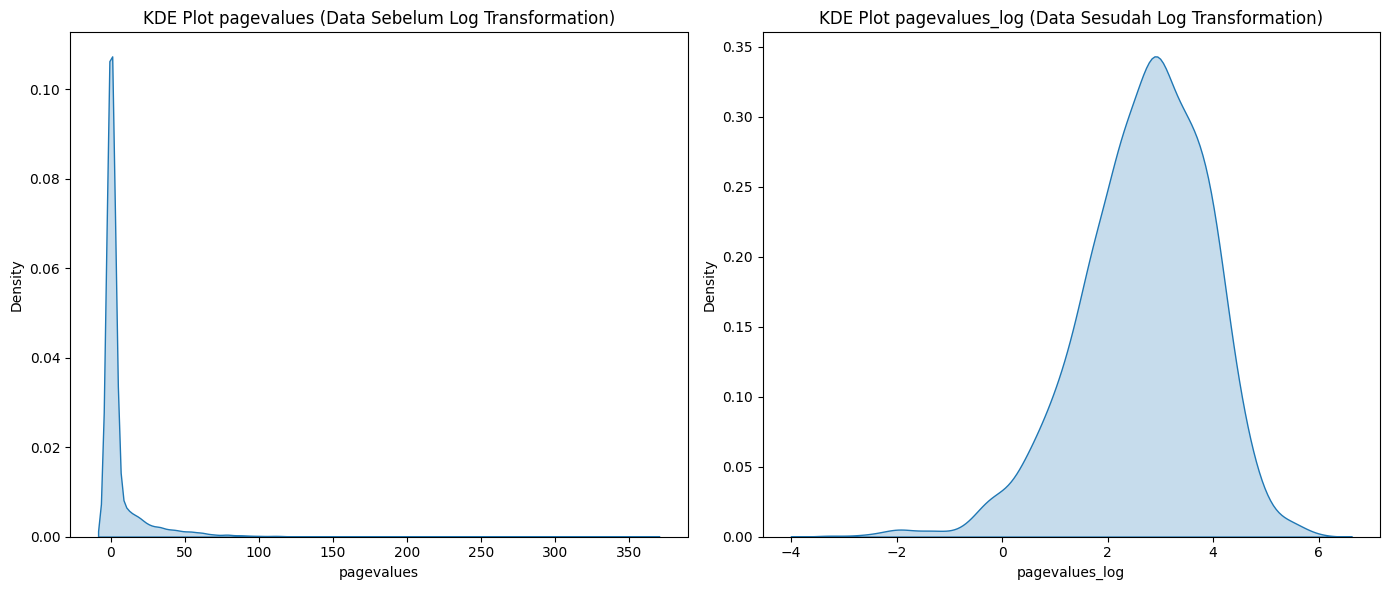

In [37]:
#menunjukan hasil data yang sudah dilakukan log transformasi
# Membuat KDE plot sebelum dan sesudah log transformasi
columns_to_plot = ['administrative_duration', 'informational_duration', 'product_related',
                   'product_related_duration', 'bounce_rates', 'exit_rates', 'pagevalues']

for col in columns_to_plot:
    plt.figure(figsize=(14, 6))

    # KDE plot sebelum log transformasi
    plt.subplot(1, 2, 1)
    sns.kdeplot(df_cleaned[col], fill=True)
    plt.title(f'KDE Plot {col} (Data Sebelum Log Transformation)')
    plt.xlabel(col)


    # KDE plot sesudah log transformasi
    transformed_col = col + '_log'
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[transformed_col], fill=True)
    plt.title(f'KDE Plot {transformed_col} (Data Sesudah Log Transformation)')
    plt.xlabel(transformed_col)


    plt.tight_layout()
    plt.show()

1. Normalisasi dipilih untuk memastikan bahwa semua fitur dalam dataset memiliki skala yang seragam. Hal ini penting untuk meningkatkan konsistensi skala fitur dan memperbaiki stabilitas numerik.
2. alasan mengapa memilih log transformation pada kolom-kolom yang terdapat outliers yang signifikan adalah karena dari grafik outliers yang ditunjukan cenderung ke kana atau skew oleh karena itu pemilihan log transformation cukup tepat agar distribusi mendekati normal.

*italicized text*# New Section

# Categorical Data Analysis

Sebelum dilakukan encoding, ingin dicek terlebih dahulu signifikansi variabel independen kategorik terhadap variabel dependen dengan Uji Chi-Square

**Hipotesis:**
* $H_o$: $p_{value}>\alpha$ (Tidak ada hubungan antara variabel independen dan variabel kategorik)
* $H_1$: $p_{value}<\alpha$ (Terdapat hubungan antara variabel independen kategorik dan variabel dependen)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12148 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   administrative                12148 non-null  float64
 1   administrative_duration       12148 non-null  float64
 2   informational                 12148 non-null  int64  
 3   informational_duration        12148 non-null  float64
 4   product_related               12148 non-null  int64  
 5   product_related_duration      12148 non-null  float64
 6   bounce_rates                  12148 non-null  float64
 7   exit_rates                    12148 non-null  float64
 8   pagevalues                    12148 non-null  float64
 9   special_day                   12148 non-null  float64
 10  month                         12148 non-null  object 
 11  operating_systems             12148 non-null  float64
 12  browser                       12148 non-null  int64  
 13  region

In [39]:
from scipy.stats import chi2_contingency

## Hubungan visitor_type dengan revenue

In [40]:
tabel_kontingensi_visitor = data.groupby(['visitor_type','revenue']).size().unstack(fill_value=0)

In [41]:
tabel_kontingensi_visitor

revenue,0,1
visitor_type,,
New_Visitor,1265,421
Other,63,16
Returning_Visitor,8923,1460


In [42]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_visitor)

In [43]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 132.2903760698522
P-Value: 1.8771969156936832e-29
Degrees of Freedom: 2
Expected Frequencies:
[[1422.71863681  263.28136319]
 [  66.66356602   12.33643398]
 [8761.61779717 1621.38220283]]


Karena $p_{value} = 1,8771969156936832e^{-29} < \alpha = 0,05$, sehingga hasil uji Chi-Square sangat signifikan yang menandakan bahwa terdapat hubungan antara visitor_type dengan revenue. Dengan demikian, jika kita melakukan one hot encoding pada variabel visitor_type pun tidak akan sia-sia karena dapat digunakan pada pemodelan.

## Hubungan special_day dengan revenue

In [44]:
tabel_kontingensi_special_day = data.groupby(['special_day','revenue']).size().unstack(fill_value=0)

In [45]:
tabel_kontingensi_special_day

revenue,0,1
special_day,,
0.0,9083,1820
0.2,163,14
0.4,230,13
0.6,321,29
0.8,311,11
1.0,143,10


In [46]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_special_day)

In [47]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 97.21898225886486
P-Value: 2.0367744183117805e-19
Degrees of Freedom: 5
Expected Frequencies:
[[9200.41595324 1702.58404676]
 [ 149.36014159   27.63985841]
 [ 205.0537537    37.9462463 ]
 [ 295.34491274   54.65508726]
 [ 271.71731972   50.28268028]
 [ 129.107919     23.892081  ]]


Karena $p_{value} = 2,0367744183117805e^{-19} < \alpha = 0,05$, sehingga hasil uji Chi-Square sangat signifikan yang menandakan bahwa terdapat hubungan antara special_day dengan revenue. Dengan demikian, kita dapat mempertimbangkan fitur ini untuk pemodelan

## Hubungan region dengan revenue

In [48]:
tabel_kontingensi_region = data.groupby(['region','revenue']).size().unstack(fill_value=0)

In [49]:
tabel_kontingensi_region

revenue,0,1
region,,
1,3929,766
2,935,186
3,2020,348
4,987,175
5,266,52
6,689,111
7,636,119
8,374,55
9,415,85


In [50]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_region)

In [51]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 9.6006034636492
P-Value: 0.29418414917501257
Degrees of Freedom: 8
Expected Frequencies:
[[3961.84104379  733.15895621]
 [ 945.94756338  175.05243662]
 [1998.21929536  369.78070464]
 [ 980.54511031  181.45488969]
 [ 268.34194929   49.65805071]
 [ 675.07408627  124.92591373]
 [ 637.10116892  117.89883108]
 [ 362.00847876   66.99152124]
 [ 421.92130392   78.07869608]]


Karena $p_{value} = 0,29418414917501257 > \alpha = 0,05$, sehingga hasil uji Chi-Square tidak sangat signifikan yang menandakan bahwa tidak terdapat hubungan antara region dengan revenue. Dengan demikian, kita dapat mempertimbangkan bisa jika tidak menggunakan fitur ini dalam pemodelan

## Hubungan traffic type dengan revenue

In [52]:
tabel_kontingensi_traffic = data.groupby(['traffic_type','revenue']).size().unstack(fill_value=0)

In [53]:
tabel_kontingensi_traffic

revenue,0,1
traffic_type,,
1,2121,261
2,3048,839
3,1823,180
4,901,164
5,203,56
6,387,53
7,28,12
8,244,95
9,37,4


In [54]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_traffic)

In [55]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 357.0684613123949
P-Value: 3.528966471729849e-64
Degrees of Freedom: 19
Expected Frequencies:
[[2.01003309e+03 3.71966908e+02]
 [3.28001622e+03 6.06983783e+02]
 [1.69021674e+03 3.12783257e+02]
 [8.98692377e+02 1.66307623e+02]
 [2.18555235e+02 4.04447646e+01]
 [3.71290747e+02 6.87092526e+01]
 [3.37537043e+01 6.24629569e+00]
 [2.86062644e+02 5.29373559e+01]
 [3.45975469e+01 6.40245308e+00]
 [3.78041488e+02 6.99585117e+01]
 [2.06741439e+02 3.82585611e+01]
 [8.43842608e-01 1.56157392e-01]
 [6.12629733e+02 1.13370267e+02]
 [1.09699539e+01 2.03004610e+00]
 [3.12221765e+01 5.77782351e+00]
 [2.53152782e+00 4.68472176e-01]
 [8.43842608e-01 1.56157392e-01]
 [8.43842608e+00 1.56157392e+00]
 [1.43453243e+01 2.65467567e+00]
 [1.61173938e+02 2.98260619e+01]]


Karena $p_{value} = 3,528966471729849e^{-64} < \alpha = 0,05 $, sehingga hasil uji Chi-Square angat signifikan yang menandakan bahwa terdapat hubungan antara traffic_type dengan revenue. Dengan demikian, kita dapat mempertimbangkan bisa jika untuk menggunakan fitur ini dalam pemodelan

# Feature encoding

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12148 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   administrative                12148 non-null  float64
 1   administrative_duration       12148 non-null  float64
 2   informational                 12148 non-null  int64  
 3   informational_duration        12148 non-null  float64
 4   product_related               12148 non-null  int64  
 5   product_related_duration      12148 non-null  float64
 6   bounce_rates                  12148 non-null  float64
 7   exit_rates                    12148 non-null  float64
 8   pagevalues                    12148 non-null  float64
 9   special_day                   12148 non-null  float64
 10  month                         12148 non-null  object 
 11  operating_systems             12148 non-null  float64
 12  browser                       12148 non-null  int64  
 13  region

## Feature Encoding pada 'month'

In [57]:
data.month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [58]:
# Define a mapping from month abbreviations to integer values
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12,}

In [59]:
data['month_encode'] = data['month'].map(month_mapping)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12148 entries, 0 to 12329
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   administrative                12148 non-null  float64
 1   administrative_duration       12148 non-null  float64
 2   informational                 12148 non-null  int64  
 3   informational_duration        12148 non-null  float64
 4   product_related               12148 non-null  int64  
 5   product_related_duration      12148 non-null  float64
 6   bounce_rates                  12148 non-null  float64
 7   exit_rates                    12148 non-null  float64
 8   pagevalues                    12148 non-null  float64
 9   special_day                   12148 non-null  float64
 10  month                         12148 non-null  object 
 11  operating_systems             12148 non-null  float64
 12  browser                       12148 non-null  int64  
 13  region

In [61]:
data['month_encode'].fillna(data['month_encode'].mode()[0], inplace=True)

## Feature Encoding pada'visitor_type'

In [62]:
data.visitor_type.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [63]:
# One-hot encoding untuk kolom 'visitor_type'
data = pd.get_dummies(data, columns=['visitor_type'], prefix='visitor_type')

In [64]:
data.columns

Index(['administrative', 'administrative_duration', 'informational',
       'informational_duration', 'product_related', 'product_related_duration',
       'bounce_rates', 'exit_rates', 'pagevalues', 'special_day', 'month',
       'operating_systems', 'browser', 'region', 'traffic_type', 'weekend',
       'revenue', 'administrative_norm', 'informational_norm',
       'administrative_duration_log', 'informational_duration_log',
       'product_related_log', 'product_related_duration_log',
       'bounce_rates_log', 'exit_rates_log', 'pagevalues_log', 'month_encode',
       'visitor_type_New_Visitor', 'visitor_type_Other',
       'visitor_type_Returning_Visitor'],
      dtype='object')

# Handle class imbalance

In [65]:
data1 = data.drop(columns=(['month']))
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12148 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   administrative                  12148 non-null  float64
 1   administrative_duration         12148 non-null  float64
 2   informational                   12148 non-null  int64  
 3   informational_duration          12148 non-null  float64
 4   product_related                 12148 non-null  int64  
 5   product_related_duration        12148 non-null  float64
 6   bounce_rates                    12148 non-null  float64
 7   exit_rates                      12148 non-null  float64
 8   pagevalues                      12148 non-null  float64
 9   special_day                     12148 non-null  float64
 10  operating_systems               12148 non-null  float64
 11  browser                         12148 non-null  int64  
 12  region                          12148

In [66]:
from imblearn.over_sampling import SMOTE

X = data1.drop('revenue', axis=1)
y = data1['revenue']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
X_resampled.shape

In [ ]:
y_resampled.value_counts()

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Pisahkan data ke dalam set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instansiasi objek SMOTE dan sampel ulang set pelatihan saja
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Modelling dengan SMOTE

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_smote, y_train_smote)

xgb.score(X_test, y_test)

### Modelling tanpa SMOTE

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)

xgb.score(X_test, y_test)

In [ ]:
numeric_df = df_cleaned.select_dtypes(include=['number'])

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')

Todo List
- Hilangkan outlier exit_rate dan bounce_rate apabila lebih dari 10%
- Menambah 3 kolom baru untuk visitor_type
- Menambah feature pada https://docs.google.com/document/d/1nlBda9XQ-nuboR7MpqbU_VoVJqt7Ph-plnMvEKjbg10/edit

# Feature Engineering

In [ ]:
df_cleaned.head()

- conversion rate
-